In [3]:
import os

In [4]:
os.chdir('/home/beakerx/WORKING/Demo-Notebooks/python_modules')

In [6]:
#! git clone https://github.com/rocheio/wiki-table-scrape.git
os.chdir('/home/beakerx/WORKING/Demo-Notebooks/python_modules/wiki-table-scrape')

In [8]:
#! pip install -r requirements.txt
import sys
sys.path.append("/home/beakerx/WORKING/Demo-Notebooks/python_modules/")

In [9]:
import wikitablescrape

In [10]:
URL = "https://en.wikipedia.org/wiki/List_of_world_records_in_athletics"
DIR_DATA = "/home/beakerx/WORKING/Demo-Notebooks/Data/world_records"

wikitablescrape.scrape(
    url=URL,
    output_name=DIR_DATA
)

In [13]:
! ls /home/beakerx/WORKING/Demo-Notebooks/Data/world_records

world_records.csv    world_records_4.csv  world_records_8.csv
world_records_1.csv  world_records_5.csv  world_records_9.csv
world_records_2.csv  world_records_6.csv
world_records_3.csv  world_records_7.csv


In [4]:
os.chdir('/home/beakerx/WORKING/Demo-Notebooks/Data/world_records')
! head world_records.csv

In [5]:
import pandas as pd
import glob

In [6]:
path = r'/home/beakerx/WORKING/Demo-Notebooks/Data/world_records'
fields = ['Event', 'Perf.']
allFiles = glob.glob(path + "/*.csv")

In [7]:
allFiles.remove('/home/beakerx/WORKING/Demo-Notebooks/Data/world_records/world_records_8.csv')
allFiles.remove('/home/beakerx/WORKING/Demo-Notebooks/Data/world_records/world_records_9.csv')

In [8]:
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_, index_col=None, header=0, usecols=fields)
    list_.append(df)
frame = pd.concat(list_)

In [9]:
frame.head()

,Event,Perf.
0,100 m,9.58
1,200 m,19.19
2,400 m,43.03
3,800 m,1:40.91
4,1000 m,2:11.96


In [10]:
def fProcessDist(row):
    value = row['Event']
    # race names
    if value == 'Marathon':
        result = 42195
    elif value == 'Half marathon':
        result = 42195/2
    elif value == 'Mile':
        result = 1609.34
    elif ('×' in value):
        result = None
    else:
        # units
        lSplt = value.split(' ')
        if len(lSplt)>1:
            if lSplt[1] == 'm':
                num = lSplt[0]
            elif lSplt[1] == 'km':
                try:
                    num = int(lSplt[0])
                    num = num * 1000
                except:
                    num = -1
            else:
                # not useful record
                num = -1
                
            if num != -1:
                # convert to integer
                try:
                    result = int(num)
                except:
                    result = int(num.replace(',', '')) 
            else:
                result = None
        else:
            result = None
    return result

In [11]:
import math

def fProcessPerf(row):
    value = row['Perf.']
    chk = row['Distance']
    tmp1 = value.split(':')
    if math.isnan( chk ):
        milsec = None
    elif len(tmp1)>1:
        tmp2 = tmp1[1].split('.')
        if len(tmp2)>1:
            milsec = int(tmp1[0])*3600 + int(tmp2[0])*60 + int(tmp2[1])
        else:
            milsec = None
    else:
        tmp2 = value.split('.')
        if len(tmp2)>1:
            milsec = int(tmp2[0])*60 + int(tmp2[1])
        else:
            milsec = None
    return milsec

In [12]:
frame['Distance'] = frame.apply(fProcessDist, axis=1)

In [13]:
frame['Performance'] = frame.apply(fProcessPerf, axis=1)

In [14]:
frame.head()

,Event,Perf.,Distance,Performance
0,100 m,9.58,100.0,598.0
1,200 m,19.19,200.0,1159.0
2,400 m,43.03,400.0,2583.0
3,800 m,1:40.91,800.0,6091.0
4,1000 m,2:11.96,1000.0,7956.0


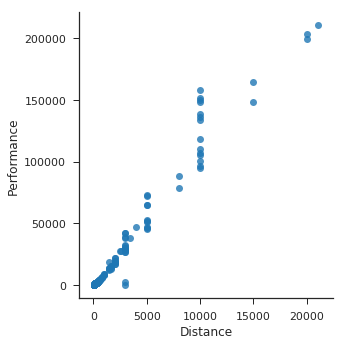

In [32]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
plt = sns.lmplot('Distance', # Horizontal axis
           'Performance', # Vertical axis
           data=df, # Data source
           fit_reg=False, # Don't fix a regression line
            )

(0, 400)

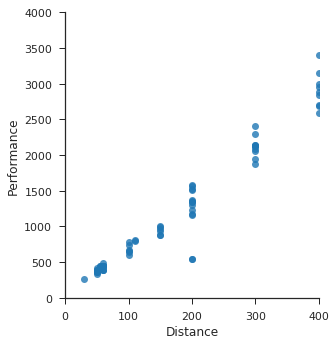

In [43]:
# Create scatterplot of dataframe
plt = sns.lmplot('Distance', # Horizontal axis
           'Performance', # Vertical axis
           data=df, # Data source
           fit_reg=False, # Don't fix a regression line
            )

axes = plt.axes

axes[0,0].set_ylim(0,4000)
axes[0,0].set_xlim(0,400)